In [350]:
import pandas as pd

# Pandas is a powerful library for data manipulation and analysis

In [351]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with your actual file path
file_path = '/content/drive/My Drive/Python/data.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Now we drop Referance column
data=data.drop(columns=['Reference'])

# Show the content
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Density (Kg/m3)  Time (hr)  Surface temperature (oC)  \
0          797.762   3.333333                    202.67   
1          797.762   3.666667                    202.67   
2          797.762   4.000000                    203.00   
3          797.762   4.333333                    204.33   
4          797.762   4.666667                    205.00   

   Fluid temperature (oC)  Fluid velocity (m/s)  Equivalent diameter (m)  \
0                    87.0                  0.56                   0.0147   
1                    87.0                  0.56                   0.0147   
2                    85.5                  0.56                   0.0147   
3                    85.0                  0.56                   0.0147   
4                    85.0                  0.56                   0.0147   

   Dissolved oxygen (ppmw)  Fouling factor (m2 K/kW)  
0   

In [352]:
import seaborn as sns
# which is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.

import matplotlib.pyplot as plt
# fundamental plotting library, and pyplot provides a convenient way to create a wide variety of plots and visualizations.

%matplotlib inline

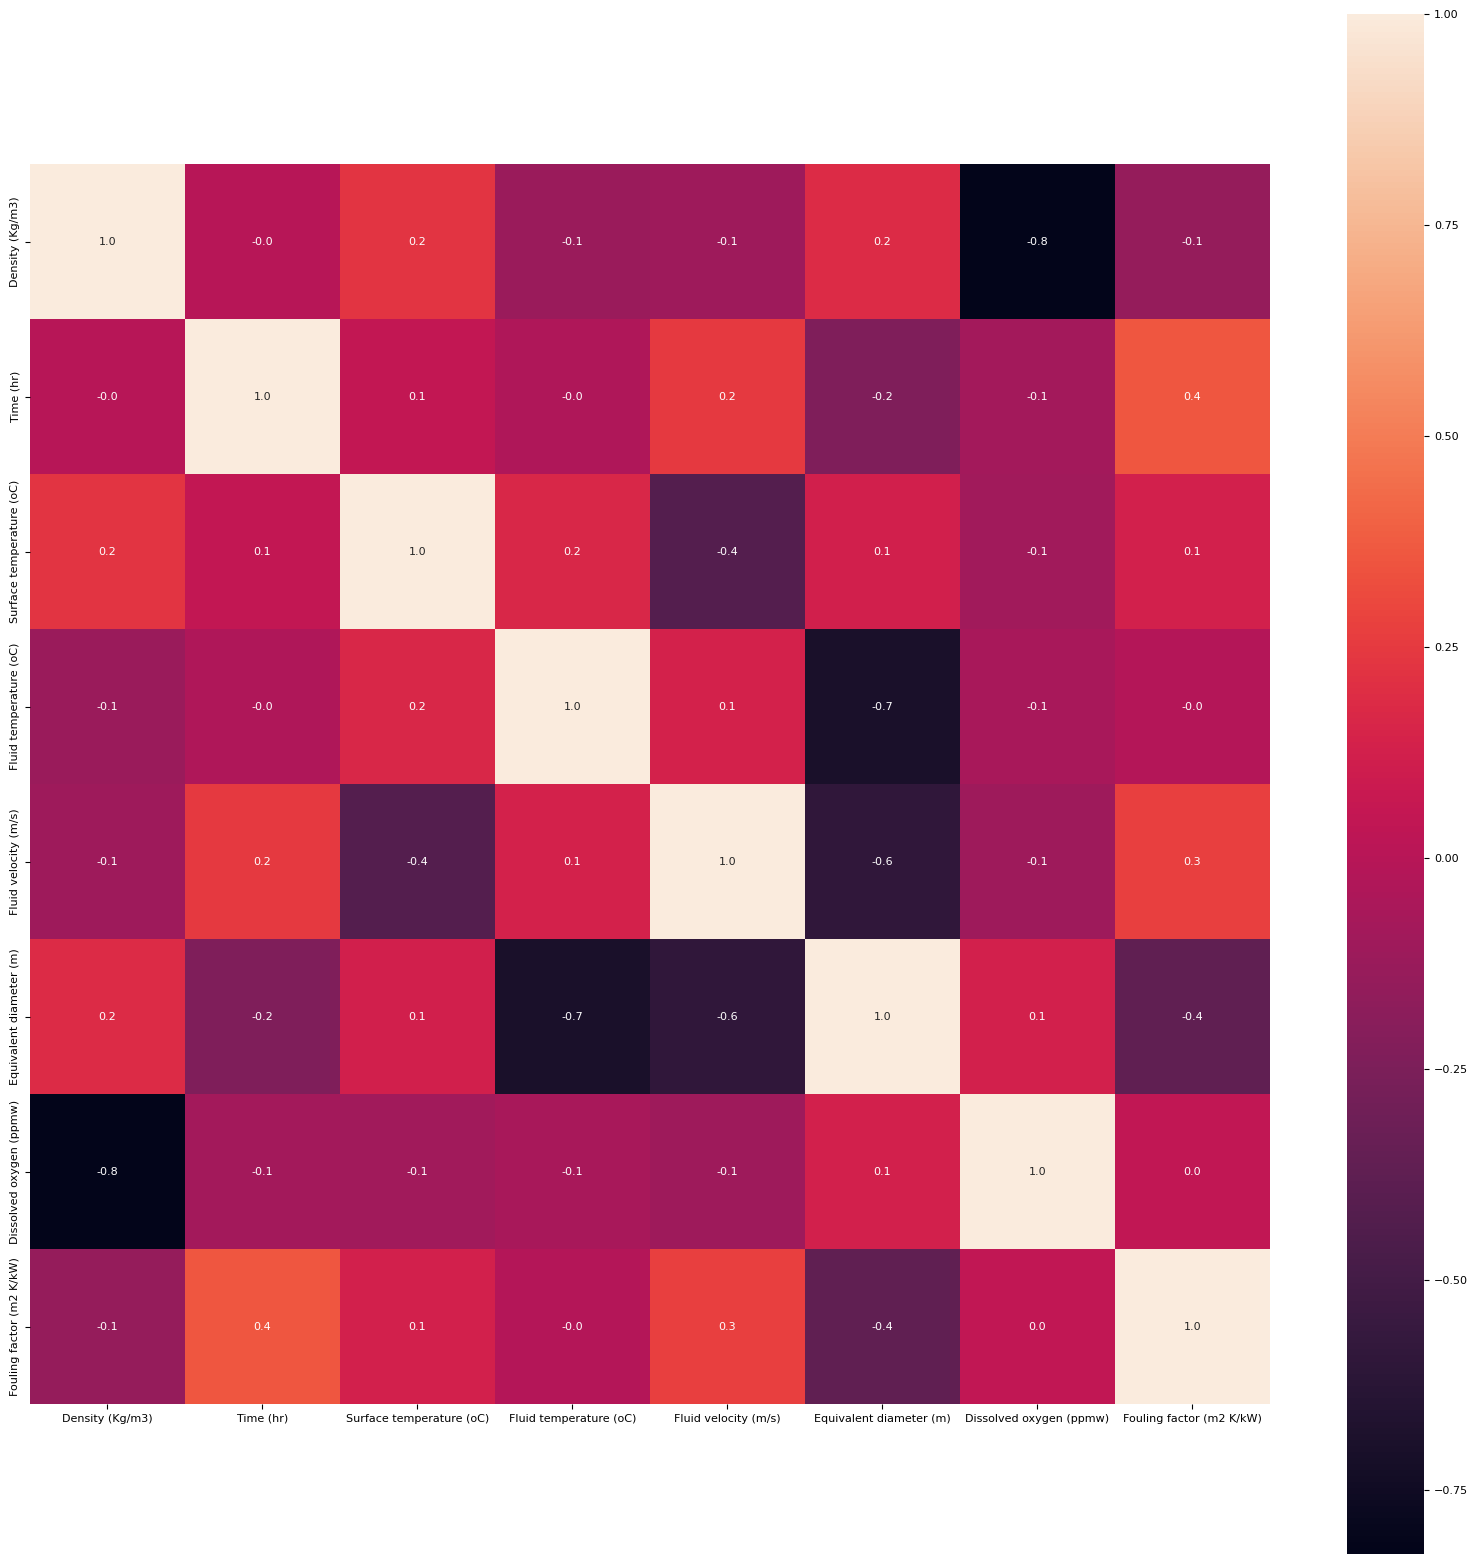

In [353]:
# 热力图
plt.figure(figsize=(20,20))
plt.rcParams.update({"font.size":8})
sns.heatmap(data.corr(),annot=True,fmt='.1f',square=True)
plt.savefig('jjj')
plt.show()

In [354]:
# First We remove our Result Data
X=data.drop(columns=['Fouling factor (m2 K/kW)'])

In [355]:
# and put into another array
y=data['Fouling factor (m2 K/kW)']

In [356]:
from sklearn.preprocessing import StandardScaler
# StandardScaler  is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance.
# it can help improve the performance of certain algorithms that are sensitive to the scale of the input features.

In [357]:
stand=StandardScaler()

In [358]:
X=stand.fit_transform(X)

# X is now standardized, meaning each feature will have a mean of 0 and a standard deviation of 1.

In [359]:
from sklearn.model_selection import train_test_split

#  split your dataset into random train and test subsets

In [360]:
tx,vx,ty,vy=train_test_split(X,y,test_size=0.2,random_state=666,shuffle=True)

# traning_X , Test_X , Traning_y , Test_y
# This means that the sequence of random numbers generated will be the same every time you run the code with that same value.

In [361]:


# First Logistic Regression



In [362]:
from sklearn.linear_model import LogisticRegression

In [363]:
log=LogisticRegression(C=0.1,n_jobs=-1,multi_class='ovr',random_state=101)

In [364]:
model=log.fit(tx,ty.astype('int'))

# this line is telling the log object to learn from the training data (tx and ty) and produce a trained model object (model) that can then be used for making predictions.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [365]:
yp=model.predict(vx)

# Predict Fouling Factor w.r.t. Test Data of X.
# the trained model to make predictions on the test set of X.

In [366]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [367]:
MAE1=mean_absolute_error(vy,yp)

# The absolute differences between the predicted values and the actual values.

In [368]:
MAE1

0.1522306487510748

In [369]:
MSE1=mean_squared_error(vy,yp)

# the average of the squared differences between the predicted values and the actual values.

In [370]:
MSE1

0.05689969707040319

In [371]:
R21=r2_score(vy,yp)

# the proportion of the variance in the dependent variable that is predictable from the independent variables.
# An R2 of 1 means the model perfectly predicts the target variable.
# An R2 of 0 means the model performs no better than simply predicting the mean of the target variable.
# A negative R2 score indicates that the model is performing worse than predicting the mean.

In [372]:
R21

-0.6162262347069787

In [373]:
import numpy as np

# to calculate RAE and MAPE, which involve array operations.  # Multi-Dimensional Array

In [374]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE1 = np.mean(errors) / mean_true

In [375]:
RAE1

# Relative Absolute Error

np.float64(0.9943834185551893)

In [376]:
ape = np.abs((vy - yp) / vy)
MAPE1 = np.mean(ape) * 100

In [377]:
MAPE1

# Mean Absolute Percentage Error

np.float64(99.94316394551991)

In [378]:


# Second Random Forest Regression




In [379]:
from sklearn.ensemble import RandomForestRegressor

In [380]:
rf=RandomForestRegressor(n_jobs=-1,random_state=111)

In [381]:
model=rf.fit(tx,ty)

In [382]:
yp=model.predict(vx)

In [383]:
MAE2=mean_absolute_error(vy,yp)

In [384]:
MAE2

0.004444711450398511

In [385]:
MSE2=mean_squared_error(vy,yp)

In [386]:
MSE2

0.0001301435716901328

In [387]:
R22=r2_score(vy,yp)

In [388]:
R22

0.9963032939422541

In [389]:
ape = np.abs((vy - yp) / vy)
MAPE2 = np.mean(ape) * 100

In [390]:
MAPE2

np.float64(16.51196148543915)

In [391]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE2 = np.mean(errors) / mean_true

In [392]:
RAE2

np.float64(0.02903322952900087)

In [393]:


# Third XG Boost



In [394]:
import xgboost as xgb
# read data into Xgboost DMatrix format
#整体
train = xgb.DMatrix(tx, ty)
test = xgb.DMatrix(vx, vy)

In [395]:
# specify parameters via map
params_xgb={
    'booster':'gbtree',     #  tree-based models
    'objective': 'reg:squarederror',
    'eval_metric':'rmse',
    'eta': 0.1,             # Same to learning rate
    'gamma':0,              # Similar to min_impurity_decrease in GBDT
    'alpha': 0,            # L1 regularization term on weight (analogous to Lasso regression)
    'lambda': 2,          # L2 regularization term on weights (analogous to Ridge regression)
    'max_depth': 6,         # Same as the max_depth of GBDT
    'subsample': 1,         # Same as the subsample of GBDT
    'colsample_bytree': 1,  # Similar to max_features in GBM
    'min_child_weight': 1,  # minimum sum of instance weight (Hessian) needed in a child
    'nthread':1,            # default to maximum number of threads available if not set
}

In [396]:
watchlist=[(test,'eval')]
num_round = 10000
bst = xgb.train(params_xgb, train, num_round,verbose_eval=50,evals=watchlist,early_stopping_rounds=50)

[0]	eval-rmse:0.17229
[50]	eval-rmse:0.02800
[100]	eval-rmse:0.02038
[150]	eval-rmse:0.01679
[200]	eval-rmse:0.01550
[250]	eval-rmse:0.01484
[300]	eval-rmse:0.01404
[350]	eval-rmse:0.01343
[400]	eval-rmse:0.01310
[450]	eval-rmse:0.01285
[500]	eval-rmse:0.01264
[550]	eval-rmse:0.01250
[600]	eval-rmse:0.01236
[650]	eval-rmse:0.01226
[700]	eval-rmse:0.01217
[750]	eval-rmse:0.01212
[800]	eval-rmse:0.01205
[850]	eval-rmse:0.01204
[852]	eval-rmse:0.01204


In [397]:
 yp=bst.predict(test)

In [398]:
MAE3=mean_absolute_error(vy,yp)

In [399]:
MAE3

0.005154472675696816

In [400]:
MSE3=mean_squared_error(vy,yp)

In [401]:
MSE3

0.00014505596982039015

In [402]:
R23=r2_score(vy,yp)

In [403]:
R23

0.9958797098052298

In [404]:
ape = np.abs((vy - yp) / vy)
MAPE3 = np.mean(ape) * 100

In [405]:
MAPE3

np.float64(25.052877067749872)

In [406]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE3 = np.mean(errors) / mean_true

In [407]:
RAE3

np.float64(0.033669449628963274)

In [408]:


# Fourth Bagging Regression



In [409]:
from sklearn.ensemble import BaggingRegressor

In [410]:
bag=BaggingRegressor(n_jobs=-1,random_state=666)

In [411]:
model=bag.fit(tx,ty)

In [412]:
yp=model.predict(vx)

In [413]:
MSE4=mean_squared_error(vy,yp)

In [414]:
MSE4

0.00016527191352281003

In [415]:
MAE4=mean_absolute_error(vy,yp)

In [416]:
MAE4

0.0048864747579250535

In [417]:
R24=r2_score(vy,yp)

In [418]:
R24

0.9953054793566778

In [419]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE4 = np.mean(errors) / mean_true

In [420]:
RAE4

np.float64(0.0319188646592091)

In [421]:
ape = np.abs((vy - yp) / vy)
MAPE4 = np.mean(ape) * 100

In [422]:
MAPE4

np.float64(15.94535742488479)

In [423]:


# Fifth KNN Regression



In [424]:
from sklearn.neighbors import KNeighborsRegressor

In [425]:
KNN=KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

In [426]:
KNN.fit(tx,ty)

KNeighborsRegressor(n_jobs=-1)

In [427]:
yp=KNN.predict(vx)

In [428]:
MAE5=mean_absolute_error(vy,yp)

In [429]:
MAE5

0.007082085074539027

In [430]:
MSE5=mean_squared_error(vy,yp)

In [431]:
MSE5

0.0006938132261660094

In [432]:
R25=r2_score(vy,yp)

In [433]:
R25

0.9802923531081597

In [434]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE5 = np.mean(errors) / mean_true

In [435]:
RAE5

np.float64(0.04626077616232374)

In [436]:
ape = np.abs((vy - yp) / vy)
MAPE5 = np.mean(ape) * 100

In [437]:
MAPE5

np.float64(19.185105903353154)

In [438]:


# Sixth Bayesian Ridge



In [439]:
from sklearn.linear_model import BayesianRidge

In [440]:
regressor = BayesianRidge()
# 拟合模型
BY=regressor.fit(tx, ty)
# 进行预测
yp = BY.predict(vx)

In [441]:
MAE6=mean_absolute_error(vy,yp)

In [442]:
MAE6

0.10655215844082618

In [443]:
MSE6=mean_squared_error(vy,yp)

In [444]:
MSE6

0.022564414219364417

In [445]:
R26=r2_score(vy,yp)

In [446]:
R26

0.3590616451435962

In [447]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE6 = np.mean(errors) / mean_true

In [448]:
RAE6

np.float64(0.6960076727918091)

In [449]:
ape = np.abs((vy - yp) / vy)
MAPE6 = np.mean(ape) * 100

In [450]:
MAPE6

np.float64(537.699736258183)

In [451]:


# Seventh Gaussian Process Regression



In [452]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# 定义高斯过程回归模型
kernel = RBF(length_scale=1.0)  # 核函数
regressor = GaussianProcessRegressor(kernel=kernel)

# 拟合模型
regressor.fit(tx,ty)

yp, sigma = regressor.predict(vx, return_std=True)

print("预测结果:", yp)
print("标准差:", sigma)


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


预测结果: [0. 0. 0. ... 0. 0. 0.]
标准差: [1. 1. 1. ... 1. 1. 1.]


In [453]:
MAE7=mean_absolute_error(vy,yp)

In [454]:
MAE7

0.1530904939789338

In [455]:
MSE7=mean_squared_error(vy,yp)

In [456]:
MSE7

0.05864197930600078

In [457]:
R27=r2_score(vy,yp)

In [458]:
R27

-0.6657154657999411

In [459]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE7 = np.mean(errors) / mean_true

In [460]:
RAE7

np.float64(1.0)

In [461]:
ape = np.abs((vy - yp) / vy)
MAPE7 = np.mean(ape) * 100

In [462]:
MAPE7

np.float64(100.0)

In [463]:


# Eighth SVR



In [464]:
from sklearn.svm import SVR

In [465]:
svr=SVR().fit(tx,ty)
yp=svr.predict(vx)

In [466]:
MAE8=mean_absolute_error(vy,yp)

In [467]:
MAE8

0.05220129958950354

In [468]:
MSE8=mean_squared_error(vy,yp)

In [469]:
MSE8

0.004014678630175933

In [470]:
R28=r2_score(vy,yp)

In [471]:
R28

0.8859637351323804

In [472]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE8 = np.mean(errors) / mean_true

In [473]:
RAE8

np.float64(0.3409832853285245)

In [474]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE8 = np.mean(ape) * 100

In [475]:
MAPE8

np.float64(216.61769529533345)

In [476]:


# Ninth LGB



In [477]:
#整体
import lightgbm as lgb
train_data = lgb.Dataset(tx, ty)
test_data = lgb.Dataset(vx, vy)

In [478]:
# specify parameters via map
params_lgb = {
    'boost':'gbdt',
    'max_depth': -1,                # Same to max_depth of xgboost
    'application':'regression',     # Same to objective of xgboost
    'learning_rate': 0.1,           # Same to eta of xgboost
    'lambda_l2': 2,                 # Same to lambda of xgboost
    'min_data_in_leaf': 20,         # Same to min_samples_leaf of GBDT
    'bagging_fraction': 1.0,        # Same to subsample of xgboost
    'feature_fraction': 1.0,         # Same to colsample_bytree of xgboost
    'min_sum_hessian_in_leaf': 1e-3, # Same to min_child_weight of xgboost
    'num_threads': 1,
    'metric':'mae'
}

In [479]:
num_round = 1000
best = lgb.train(params_lgb, train_data, num_round, callbacks=[lgb.log_evaluation(period=50), lgb.early_stopping(stopping_rounds=50)], valid_sets=test_data)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 9300, number of used features: 7
[LightGBM] [Info] Start training from score 0.150789
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0149937
[100]	valid_0's l1: 0.0108735
[150]	valid_0's l1: 0.00951907
[200]	valid_0's l1: 0.00876773
[250]	valid_0's l1: 0.00832923
[300]	valid_0's l1: 0.00798104
[350]	valid_0's l1: 0.00764383
[400]	valid_0's l1: 0.00742068
[450]	valid_0's l1: 0.0072649
[500]	valid_0's l1: 0.00717573
[550]	valid_0's l1: 0.00702994
[600]	valid_0's l1: 0.00692488
[650]	valid_0's l1: 0.00680148
[700]	valid_0's l1: 0.00670152
[750]	valid_0's l1: 0.00658172
[800]	valid_0's l1: 0.00648156
[850]	valid_0's l1: 0.00642706
[900]	valid_0

In [480]:
yp=best.predict(vx)

In [481]:
MAE9=mean_absolute_error(vy,yp)

In [482]:
MAE9

0.006228603685630836

In [483]:
MSE9=mean_squared_error(vy,yp)

In [484]:
MSE9

0.0002617230603016948

In [485]:
R29=r2_score(vy,yp)

In [486]:
R29

0.9925658009081488

In [487]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE9 = np.mean(errors) / mean_true

In [488]:
RAE9

np.float64(0.04068576384950414)

In [489]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE9 = np.mean(ape) * 100

In [490]:
MAPE9

np.float64(27.66026784476988)

In [491]:


# Tenth MLP Regression



In [492]:
from sklearn.neural_network import MLPRegressor

In [493]:
MLP=MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam')

In [494]:
MLP.fit(tx,ty)

MLPRegressor(hidden_layer_sizes=(100, 50))

In [495]:
yp=MLP.predict(vx)

In [496]:
MAE10=mean_absolute_error(vy,yp)

In [497]:
MAE10

0.02490762564259579

In [498]:
MSE10=mean_squared_error(vy,yp)

In [499]:
MSE10

0.0019538404291606247

In [500]:
R210=r2_score(vy,yp)

In [501]:
R210

0.944501494337777

In [502]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE10 = np.mean(errors) / mean_true

In [503]:
RAE10

np.float64(0.16269870842550965)

In [504]:
ape = np.abs((vy - yp) / vy)
MAPE10 = np.mean(ape) * 100

In [505]:
MAPE10

np.float64(57.37720246510166)

In [506]:


# Eleventh Sequential



In [507]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN,GRU
from tensorflow.keras.optimizers import Adam

In [508]:
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(7,1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [509]:
model.fit(tx, ty, epochs=150, batch_size=32)

Epoch 1/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0323
Epoch 2/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0160
Epoch 3/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0092
Epoch 4/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0067
Epoch 5/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0063
Epoch 6/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0063
Epoch 7/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050
Epoch 8/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048
Epoch 9/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0044
Epoch 10/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0052
Epoch 11/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0035
Epoch 12/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0034
Epoch 13/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036
Epoch 14/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0040
Epoch 15/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3

In [510]:
yp=model.predict(vx)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [511]:
MAE11=mean_absolute_error(vy,yp)

In [512]:
MAE11

0.013397856065261109

In [513]:
MSE11=mean_squared_error(vy,yp)

In [514]:
MSE11

0.0007095904197457199

In [515]:
R211=r2_score(vy,yp)

In [516]:
R211

0.9798442046032207

In [517]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE11 = np.mean(errors) / mean_true

In [518]:
RAE11

np.float64(0.08751592418994178)

In [519]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE11 = np.mean(ape) * 100

In [520]:
MAPE11

np.float64(52.85837178536078)

In [521]:


# 12 Sequential Method



In [522]:
model = Sequential()

model.add(SimpleRNN(64,activation='relu', input_shape=(7,1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [523]:
model.fit(tx,ty,epochs=150, batch_size=32)

Epoch 1/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0230
Epoch 2/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 3/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 4/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 5/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0024
Epoch 6/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0023
Epoch 7/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 8/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 9/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 10/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 11/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 12/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 13/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 14/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013
Epoch 15/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 1

In [524]:
yp=model.predict(vx)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [525]:
MAE12=mean_absolute_error(vy,yp)

In [526]:
MAE12

0.010080814049430658

In [527]:
MSE12=mean_squared_error(vy,yp)

In [528]:
MSE12

0.0005569397934526904

In [529]:
R212=r2_score(vy,yp)

In [530]:
R212

0.9841802197256558

In [531]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE12 = np.mean(errors) / mean_true

In [532]:
RAE12

np.float64(0.06584872638021431)

In [533]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE12 = np.mean(ape) * 100

In [534]:
MAPE12

np.float64(41.97828185134175)

In [535]:


# 13 Sequential GRU



In [536]:
model = Sequential()

model.add(GRU(64,activation='relu',input_shape= (7, 1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [537]:
model.fit(tx,ty,epochs=150, batch_size=32)

Epoch 1/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0281
Epoch 2/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0113
Epoch 3/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0064
Epoch 4/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0060
Epoch 5/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0050
Epoch 6/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0046
Epoch 7/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0039
Epoch 8/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0041
Epoch 9/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038
Epoch 10/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0039
Epoch 11/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0033
Epoch 12/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0027
Epoch 13/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0029
Epoch 14/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0024
Epoch 15/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 2

In [538]:
yp=model.predict(vx)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [539]:
MAE13=mean_absolute_error(vy,yp)

In [540]:
MAE13

0.010195519680670053

In [541]:
MSE13=mean_squared_error(vy,yp)

In [542]:
MSE13

0.00039358187592725114

In [543]:
R213=r2_score(vy,yp)

In [544]:
R213

0.9888203736376359

In [545]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE13 = np.mean(errors) / mean_true

In [546]:
RAE13

np.float64(0.06659799322401443)

In [547]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE13 = np.mean(ape) * 100

In [548]:
MAPE13

np.float64(35.38284576549942)

In [549]:


# 14 LSTM



In [550]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.python.keras.layers import Layer


BATCH_SIZE = 32
EPOCHS = 150
FUTURE_PERIOD_PREDICT = 1


# Assuming X_train, y_train, X_test, and y_test are already defined
# by the previous data splitting cell
print('X_train', tx.shape,'y_train', ty.shape)
print('X_test', vx.shape,'y_test', vy.shape)


inp = Input(shape=(tx.shape[1], 1)) # Use the actual number of features and add a time step dimension
x = GRU(256, return_sequences=True)(inp)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Implement attention mechanism using standard Keras layers
# Compute attention scores
attention_scores = TimeDistributed(Dense(1, activation='tanh'))(x)
# Apply softmax to get attention weights
attention_weights = Softmax(axis=1)(attention_scores)
# Apply attention weights to the GRU output using element-wise multiplication
context_vector = x * attention_weights
# Sum the weighted inputs over time steps
context_vector = Lambda(lambda z: K.sum(z, axis=1))(context_vector)


x = Dense(32, activation="relu")(context_vector)
x = Dropout(0.2)(x)
x = Dense(1, activation="relu")(x)
model_lstm_attention = tf.keras.Model(inputs=inp, outputs=x)
model_lstm_attention.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_attention.summary()

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

tf.keras.utils.plot_model(model_lstm_attention,
                          to_file="model_lstm_attention.png",
                          show_shapes=True)

model_lstm_attention.fit(tx, ty,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(vx, vy),
                    callbacks=[earlyStopping]) # Added early stopping callback

# model_lstm_attention.save('lstm+gru.h5')

predicted_LSTM_Att = model_lstm_attention.predict(vx)

X_train (9300, 7) y_train (9300,)
X_test (2326, 7) y_test (2326,)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_3 (GRU)         │ (None, 7, 256)    │    198,912 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 7, 256)    │          0 │ gru_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 256)    │      1,024 │ dropout_2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 7, 1)      │        257 │ batch_normalizat… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax_1 (Softmax) │ (None, 7, 1)      │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 7, 256)    │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ softmax_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 256)       │          0 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      8,224 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         33 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 208,450 (814.26 KB)

 Trainable params: 207,938 (812.26 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0503 - val_loss: 0.0513
Epoch 2/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0376 - val_loss: 0.0314
Epoch 3/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 0.0290 - val_loss: 0.0192
Epoch 4/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0191 - val_loss: 0.0108
Epoch 5/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0151 - val_loss: 0.0092
Epoch 6/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0134 - val_loss: 0.0104
Epoch 7/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0121 - val_loss: 0.0077
Epoch 8/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0101 - val_loss: 0.0072
Epoch 9/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0095 - val_loss: 0.0064
Epoch 10/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 11/150
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0104 - val_loss: 0.0046
Epoch 12/150
291/291 

In [551]:
yp=predicted_LSTM_Att

In [552]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [553]:
MAE14=mean_absolute_error(vy,yp)

In [554]:
MAE14

0.02123898494068635

In [555]:
MSE14=mean_squared_error(vy,yp)

In [556]:
MSE14

0.00181625310908895

In [557]:
R214=r2_score(vy,yp)

In [558]:
R214

0.9484096388044817

In [559]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE14 = np.mean(errors) / mean_true

In [560]:
RAE14

np.float64(0.1387348383865622)

In [561]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE14 = np.mean(ape) * 100

In [562]:
MAPE14

np.float64(38.17594997737909)

In [563]:
# Now we compair our all resluts and ansure that which model is prefer for modeling.

In [564]:
final_result = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2', 'RAE', 'MAPE'],
    'Logistic Regression': [MAE1, MSE1, R21, RAE1, MAPE1],
    'Random Forest Regression': [MAE2, MSE2, R22, RAE2, MAPE2],
    'XG Boost': [MAE3, MSE3, R23, RAE3, MAPE3],
    'Bagging Regression': [MAE4, MSE4, R24, RAE4, MAPE4],
    'KNN Regression': [MAE5, MSE5, R25, RAE5, MAPE5],
    'Bayesian Ridge': [MAE6, MSE6, R26, RAE6, MAPE6],
    'Gaussian Process Regression': [MAE7, MSE7, R27, RAE7, MAPE7],
    'SVR': [MAE8, MSE8, R28, RAE8, MAPE8],
    'LGB': [MAE9, MSE9, R29, RAE9, MAPE9],
    'MLP Regression': [MAE10, MSE10, R210, RAE10, MAPE10],
    'Sequential': [MAE11, MSE11, R211, RAE11, MAPE11],
    'SimpleRNN': [MAE12, MSE12, R212, RAE12, MAPE12],
    'GRU': [MAE13, MSE13, R213, RAE13, MAPE13],
    'LSTM': [MAE14, MSE14, R214, RAE14, MAPE14]
})

In [569]:
display(final_result)

,Metric,Logistic Regression,Random Forest Regression,XG Boost,Bagging Regression,KNN Regression,Bayesian Ridge,Gaussian Process Regression,SVR,LGB,MLP Regression,Sequential,SimpleRNN,GRU,LSTM
0,MAE,0.152231,0.004445,0.005154,0.004886,0.007082,0.106552,0.153090,0.052201,0.006229,0.024908,0.013398,0.010081,0.010196,0.021239
1,MSE,0.056900,0.000130,0.000145,0.000165,0.000694,0.022564,0.058642,0.004015,0.000262,0.001954,0.000710,0.000557,0.000394,0.001816
2,R2,-0.616226,0.996303,0.995880,0.995305,0.980292,0.359062,-0.665715,0.885964,0.992566,0.944501,0.979844,0.984180,0.988820,0.948410
3,RAE,0.994383,0.029033,0.033669,0.031919,0.046261,0.696008,1.000000,0.340983,0.040686,0.162699,0.087516,0.065849,0.066598,0.138735
4,MAPE,99.943164,16.511961,25.052877,15.945357,19.185106,537.699736,100.000000,216.617695,27.660268,57.377202,52.858372,41.978282,35.382846,38.175950
